<a href="https://colab.research.google.com/github/shininglight99/Danna-archive/blob/master/Introduction_to_Portfolio_Construction_and_Analyzing_with_Pythons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Basics of Returns

prices_a=[8.70,8.91,8.71]
8.91/8.70-1


0.024137931034482918

In [2]:
prices_a[1:]

[8.91, 8.71]

In [3]:
prices_a[:-1]

[8.7, 8.91]

In [4]:
import numpy as np #numpy is a module 
prices_a= np.array([8.7,8.91,8.71])
prices_a

array([8.7 , 8.91, 8.71])

In [5]:
prices_a[1:]/prices_a[:-1]-1

array([ 0.02413793, -0.02244669])

In [6]:
import pandas as pd
prices = pd.DataFrame({"BLUE":[8.7,8.91,8.71,8.43,8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]
                       })  

prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [7]:
prices.iloc[1:]


,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [8]:
prices.iloc[:-1]


,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [9]:
prices.iloc[1:]/prices.iloc[:-1]-1 # index number is different

,BLUE,ORANGE
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,NaN,NaN


In [10]:
prices.iloc[1:].values/prices.iloc[:-1]-1 # using 'values' as numpy

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [11]:
prices.shift(1) #shift one row 

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


In [12]:
prices/prices.shift(1)-1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [13]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


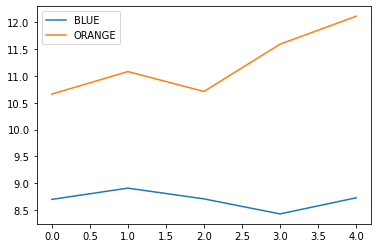

In [14]:
prices.plot()

In [15]:
matplotlib inline

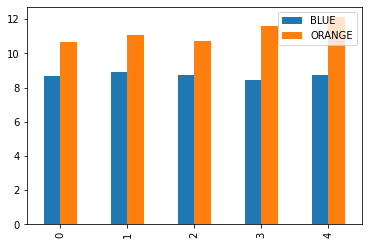

In [16]:
prices.plot.bar()

In [17]:
prices.std()

BLUE      0.171697
ORANGE    0.616806
dtype: float64

In [18]:
prices.head()

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [19]:
prices.mean()

BLUE       8.696
ORANGE    11.230
dtype: float64

In [20]:
prices +1

,BLUE,ORANGE
0,9.70,11.66
1,9.91,12.08
2,9.71,11.71
3,9.43,12.59
4,9.73,13.11


In [21]:
np.prod(prices+1)-1

BLUE       85641.463581
ORANGE    272238.288827
dtype: float64

In [22]:
(((prices+1).prod()-1)*100).round(2)

BLUE       8564146.36
ORANGE    27223828.88
dtype: float64

In [23]:
#Annualization
rm=0.01
(1+rm)**12-1

0.12682503013196977

In [24]:
rq=0.04
(1+rq)**24-1


1.5633041648917523

In [25]:
#Risk adjusted returns

In [26]:
import pandas as pd
prices = pd.DataFrame({"BLUE":[8.7,8.91,8.71,8.43,8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]
                       })  

prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [27]:
deviations = prices - prices.mean()
squared_deviations = deviations**2
variance= squared_deviations.mean()
import numpy as np
volatility = np.sqrt(variance)
volatility

BLUE      0.153571
ORANGE    0.551688
dtype: float64

In [28]:
prices.std()

BLUE      0.171697
ORANGE    0.616806
dtype: float64

In [29]:
prices.shape #number of rows and columns

(5, 2)

In [30]:
number_of_obs = prices.shape[0]
variance = squared_deviations.sum()/(number_of_obs -1)
volatility = variance**5
volatility

BLUE      2.226575e-08
ORANGE    7.970544e-03
dtype: float64

In [31]:
prices.std()

BLUE      0.171697
ORANGE    0.616806
dtype: float64

In [32]:
prices.std()*np.sqrt(12)

BLUE      0.594777
ORANGE    2.136680
dtype: float64

In [33]:
prices.std()*(12**0.5)

BLUE      0.594777
ORANGE    2.136680
dtype: float64

In [34]:
from google.colab import drive
drive.mount ('/content/gdrive')
path = "/gdrive/content/Portfolios_Formed_on_ME_monthly_EW"





Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


KeyError: ignored

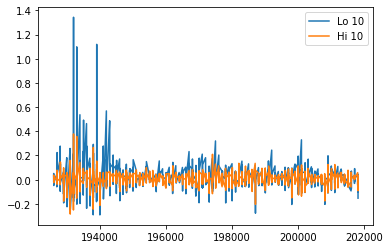

In [35]:
#Compute Drawdown- maximum loss you could have been experienced

import pandas as pd
me_m = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                header=0, index_col=0, parse_dates=True, na_values= -99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.colums = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()
rets.head()
rets.index
rets.index= pd.to_datetime(rets.index, format="%Y%m") #convert index into format
rets.head()
rets.index #from now, dtype=datetime64
rets.index = rets.index.to_period('M') #rets.index: series, to_period: method of series. Convert to montly period
rets.head()
rets.info

#1. Compute a wealth index

wealth_index = 1000*(1+rets["LargeCap"]).cumprod()    # the value of portfolio as compounding all over time
wealth_index.head()
wealth_index.plot.line()

#2. Compute a previous peak

previous_peak = wealth_index.cummax() #cumulative max
previous_peak.plot.line()

drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()
drawdown.head()
drawdown.min()  
drawdown["1975":].idxmin()
drawdown.idxmin()

#optional

def drawdown(returns_series: pd.Series):
  """
  Takes a time series of asset returns
  Computes and returns a DataFrame that contains:
  the wealth index
  the previous peaks
  percent drawdowns
  """
  wealth_index = 1000*(1+return_series).cumprod() #cumulative production
  previous_peaks = wealth_index.cummax()
  drawdowns = (wealth_index - previous_peaks)/previous_peaks
  return pd.DataFrame({
      "Wealth": wealth_index,
      "Peaks" : previous_peaks,
      "Drawdown":drawdowns
  })
drawdown(rets["LargeCap"]).head()
drawdown(rets["LargeCap"]).min() 
drawdown(rets["SmallCap"])["Drawdown"].idxmin()
drawdown(rets["1940":]["SmallCap"])["Drawdown"].idxmin()
drawdown(rets["1975":]["SmallCap"])["Drawdown"].idxmin()
drawdown(rets["1940":]["LargeCap"])["Drawdown"].idxmin()
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]].plot() # If you want to know only wealth and peaks columns 
#we can get the same answer we've got before.







In [36]:
# Building MODULES
import pandas as pd



In [37]:
%load_ext autoreload
%autoreload 2  #update the message in h.message

In [49]:
from google.colab import files
src= list(files.upload().values())[0]
open('edhec_risk_kit.py','wb').write(src)
import edhec_risk_kit

Saving edhec_risk_kit_py.py to edhec_risk_kit_py (5).py


SyntaxError: ignored

NameError: ignored

In [ ]:
import edhec_risk_kit as erk

returns = erk.get_ffme_returns()

In [ ]:
returns.head()

In [ ]:
erk.drawdown(returns["SmallCap"])["Drawdown"].min()
erk.drawdown(returns["1975:"]["SmallCap"])["Drawdown"].min()


In [ ]:
hfi=erk.get_hfi_returns()
hfi.head()


In [ ]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()], axis = "columns")

In [ ]:
erk.skewness(hfi).sort_values()

In [ ]:
import scipy.stats
scipy.stats.skew(hfi)

In [ ]:
erk.skewness(hfi)
hfi.shape

In [ ]:
import numpy as np
normal_rets = np.random.normal(0, .15, size=(263,1))

In [ ]:
erk.skewness(normal_rets)

In [ ]:
# KURTOSIS

In [ ]:
erk.kurtosis(hfi)

In [ ]:
scipy.stats.kurtosis(normal_rets)

In [ ]:
scipy.stats.jarque_bera(normal_rets)

In [ ]:
scipy.stats.jarque_bera(hfi)

In [ ]:
erk.is_normal(normal_rets)
erk.is_normal(hfi)

In [ ]:
hfi.aggregate(erk.is_normal)

In [ ]:
ffme= erk.get_ffme_returns()
erk.skewness(ffme)
erk.kurtosis(ffme)
erk.is_normal(ffme)
ffme.aggregate(erk.is_normal)

In [ ]:
#DOWNSIDE

In [ ]:
import pandas as pd
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
hfi = erk.get_hfi_returns()

In [ ]:
#Semideviation

In [ ]:
hfi.std(ddof=0)

In [ ]:
hfi[hfi<0].std(ddof=0) #filter hfi<0

In [ ]:
erk.semideviation(hfi)

In [ ]:
###VaR and CVaR
value at Risk
-Historic VaR
-Parametric VaR - Gaussian 
-Modified Cornish-Fisher VaR


In [ ]:
import numpy as np
np.percentile(hfi, 5, axis=0)

In [ ]:
erk.var_historic(hfi)

In [ ]:
form scipy.stats import norm
z= norm.ppf(.05) #percent point function
z
hfi.mean() +z*hfi.std(ddof=0)

In [ ]:
erk.var_gaussian(hfi)

In [ ]:
var_list = [erk.var_gaussian(hfi),erk.var_gaussian(hfi, modified=True), erk.var_historic(hfi)]
comparison= pd.concat(var_list, axis=1)
comparison.columns = ["Gaussian", "Cornish-Fisher", "Historic"]
comparison.plot.bar(title = "EDHEC Hedge Fund Indices: VaR ")


In [ ]:
# BEYOND VAR aka CVar

In [ ]:
erk.cvar_historic(hfi)

In [ ]:
# Efficient Frontier part 1
import pandas as pd
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates= True)/100
ind.head()
ind.index
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.head()
ind.columns
ind.["Food "].shape
ind.columns = ind.columns.str.strip()
ind.columns
ind.shape

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
ind= erk.get_ind_returns()
ind.shape
ind.head()

In [ ]:
cols_of_interest = ["Food", "Smoke", "Coal", "Beer", "Fin"]
erk.var_gaussian(ind[cols_of_interest], modified=True)
erk.var_gaussian(ind, modified=True).sort_values().tail()
erk.var_gaussian(ind, modified=True).sort_values().head()
erk.var_gaussian(ind, modified=True).sort_values().head().plot.bar
erk.var_gaussian(ind, 0.03, 12).sort_values().head().plot.bar(title= "Industry Sharpe Ratios 1926-2018", color="green")


In [ ]:
er= erk.annualize_rets(ind["1995":"2000"], 12)

In [ ]:
er.sort_values.plot.bar()

In [ ]:
cov = ind["1995":"2000"].cov()
cov.shape
cov


In [ ]:
#Efficient Frontier Part 2

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
ind= erk.get_ind_returns()
er= erk.annualize_rets(ind["1995":"2000"], 12)
cov = ind["1995":"2000"].cov()

def portfolio_return(weights, returns):
  """
  Weights -> Returns
  """
  return weights.T @ returns # @ transpose

def portfolio_vol(weight, covmat):
  """
  Weights -> vol
  """
  return (weights.T @ covmat @weights)**0.5

In [ ]:
l=["Food", "Beer", "Smoke", "Coal"]
er[l]
cov.loc[l, l]
weights = np.repeat(1/4, 4)
weights
erk.portfolio_return(weights, er[l])
erk.portfolio_vol(weights, cov.loc[l,l])

In [ ]:
# 2 Asset Frontier

In [ ]:
l=["Games", "Fin"]
n_points = 20
weights = [np.array([w,1-w])for w in np.linspace(0,1,n_points)]
weights
len(weights)
l
rets= [erk.porfolio_return(w,er[l]) for w in weights]
vols= [erk.porfolio_return(w,cov, loc[l,l]) for w in weights]
ef = pd.DataFrame({"R": rets, "Vol":vols})
ef.plot.scatter(x="Vol", y="R")

l=["Fin", "Beer"]
erk.plot_ef2(25,er[l], cov.loc[l,l], style =".")


In [ ]:
# Finding the max sharpe ratio portfolio

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
ind= erk.get_ind_returns()
er= erk.annualize_rets(ind["1995":"2000"], 12)
cov = ind["1995":"2000"].cov()


from scipy.optimize import minimize
import numpy as np
import pandas as pd
def msr(riskfree_rate, er, cov):  # er = expected return
  """
  RiskFree rate+ ER + COV -> W
  """
  n= er.shape[0]
  init_guess = np.repeat(1/n, n)
  bounds = ((0.0, 1.0),)*n
 
  weights_sum_to_1 ={  # no leverage
      'type': 'eq',
      'fun': lambda weights: np.sum(weights)-1
  }
  def neg_shape_ratio(weights, riskfree_rate, er, cov):
    """
    Returns the negative of the sharpe ratio, given weights
    """
    r = erk.portfolio_return(weight, er)
    vol = erk.portfolio_vol(weights, cov)
    return -(r- riskfree_rate)/vol

  results = minimize(portfolio_vol, init_guess,
                     args=(riskfree_rate, er, cov, ), method="SLSQP",
                     options = {'disp': False},
                     constraints = (return_is_target, weight_sum_to_1),
                     bounds=bounds
                     )
  return results.x

erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1 )


In [ ]:
ax= erk.plot_ef(20, er, cov)
ax.set_xlim(left=0)
rf= 0.1
w_msr = msr(rf, er, cov) #msr = miniize sharpe ratio portfolio
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk. portfolio_vol(w_msr, cov)

#Add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color ="green", marker="o", linestyle = "dashed")  

# reoptimizing#



In [ ]:
# Lack of Robustness of the Markowitz Procedure, and the GMV 

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import edhec_risk_kit as erk
ind= erk.get_ind_returns()
er= erk.annualize_rets(ind["1995":"2000"], 12)
cov = ind["1995":"2000"].cov()


l=["Food", "Steel"]

erk.msr(0.1, er[l], cov.loc[l,l])
er[l]
erk.msr(0.1, np.array([.11, .12]) , cov.loc[l,l])  #np.array([what i expect, expect]) # even a small change in expected return can cause the dramatic change
erk.msr(0.1, np.array([.10, .13]), cov.loc[l,l])
erk.msr(0.1, np.array([.13, .10]), cov.loc[l,l])
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew =True)
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew =True, show_gmv=True)



In [ ]:
# naive investors invest their money to all kind of assets evenly

In [ ]:
import os
os.getcwd()
